In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Deep Learning/placement1.csv")
df.shape
print (df)

Mounted at /content/gdrive
    cgpa  resume_score   IQ  placed
0   8.14          6.52  123       1
1   6.17          5.17  106       0
2   8.27          8.86  121       0
3   6.88          7.27  132       1
4   7.52          7.30  142       0
..   ...           ...  ...     ...
95  6.33          6.38  200       0
96  8.23          7.76   42       0
97  6.65          7.78  182       1
98  8.14          5.63  103       1
99  6.09          6.61  113       1

[100 rows x 4 columns]


In [2]:
df.head()

,cgpa,resume_score,IQ,placed
0,8.14,6.52,123,1
1,6.17,5.17,106,0
2,8.27,8.86,121,0
3,6.88,7.27,132,1
4,7.52,7.30,142,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   IQ            100 non-null    int64  
 3   placed        100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [4]:
df.value_counts()

cgpa  resume_score  IQ   placed
5.27  7.28          90   1         1
7.51  6.25          103  0         1
8.01  4.95          52   0         1
7.93  8.09          64   1         1
7.92  6.06          37   1         1
                                  ..
6.05  7.13          87   0         1
6.04  8.75          166  1         1
6.01  7.49          75   0         1
6.00  8.72          160  1         1
9.40  5.50          155  0         1
Length: 100, dtype: int64

In [5]:
abs(df.corr()['placed'].sort_values(ascending=False))

placed          1.000000
resume_score    0.160973
cgpa            0.036099
IQ              0.083031
Name: placed, dtype: float64

<Axes: >

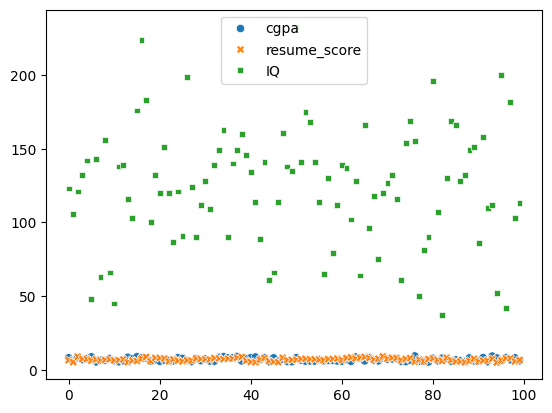

In [6]:
sns.scatterplot({'cgpa': df['cgpa'], 'resume_score': df['resume_score'],'IQ': df['IQ']})

<Axes: xlabel='cgpa', ylabel='IQ'>

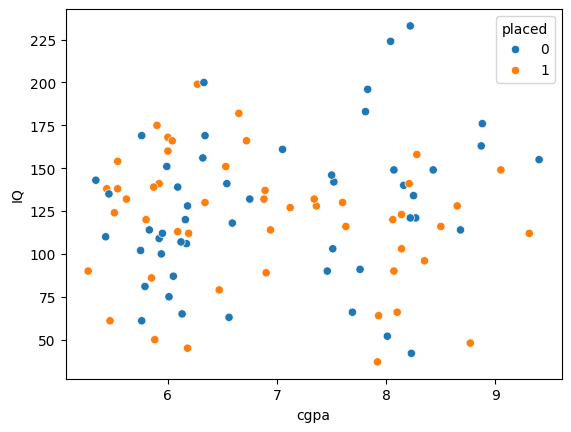

In [7]:
sns.scatterplot(data=df, x='cgpa', y='IQ', hue='placed')

<Axes: xlabel='cgpa', ylabel='resume_score'>

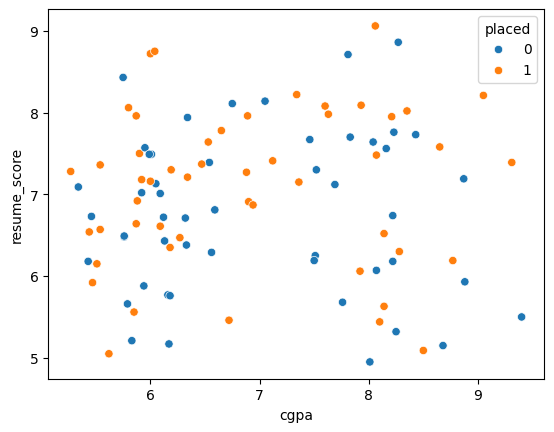

In [8]:
sns.scatterplot(data=df, x='cgpa', y='resume_score', hue='placed')

In [9]:
from sklearn.model_selection import train_test_split
x= df[["cgpa","resume_score","IQ"]]
y = df["placed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [19]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x_train,y_train)
p.coef_
p.intercept_

array([5.])

In [27]:
p.coef_

array([[  19.05,   94.91, -164.  ]])

In [28]:
y_pred = p.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" % accuracy_score(y_test,y_pred))

Accuracy: 0.600


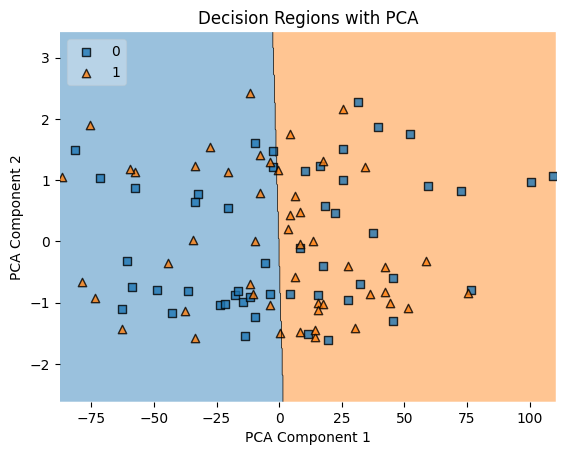

In [35]:

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

# Dimensionality reduction with PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)

# Fit the perceptron on the reduced dataset

p = Perceptron()

p.fit(x_pca, y)

# Plot decision regions

plot_decision_regions(x_pca, y.values, clf=p, legend=2)

# Add labels and title

plt.xlabel('PCA Component 1')

plt.ylabel('PCA Component 2')

plt.title('Decision Regions with PCA')

# Show the plot

plt.show()